Enter the line voltage(in volts) :735
Enter the Number of subconductors in buldle :4
Enter the diameter of a subconductor in bundle(in cm) :3.05
Enter the bundle spacing(in meter) :45.72


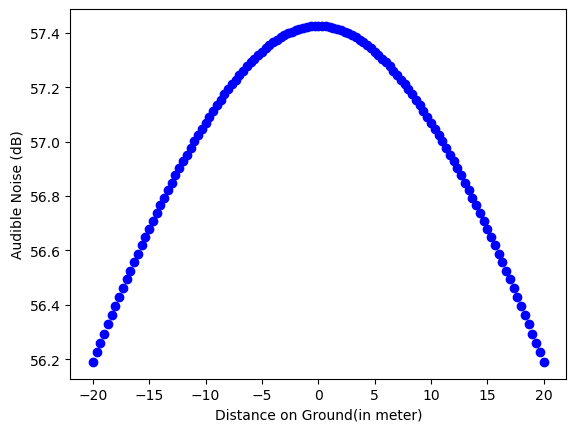

<Figure size 640x480 with 0 Axes>

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
lcs=np.array([[-14,20],[0,20],[14,20]])




V = float(input("Enter the line voltage(in volts) :"))
N = int(input("Enter the Number of subconductors in buldle :"))
d = float(input("Enter the diameter of a subconductor in bundle(in cm) :"))
r = float(d/2)
B = float(input("Enter the bundle spacing(in meter) :"))
R = float(B/math.sin(math.pi/N))
S = float(14)
Req = float(pow((N*r*pow(R,N-1)),1/N))
H = float(20)

#C = float((1+5*((H/S)**2)+4*((H/S)**4))**(1/4))

#print("Voltage gradient for outer phase lines(1st and 3rd line) : ")
#Eom = float(((R+(N-1)*r)*V)/(N*r*R*1.73205*math.log(2*H/(Req*C))))

mpcs = np.empty(121, dtype=float)


for i in range(121):
    mpcs[i]= -20+(i/3)
    
data = np.empty(121, dtype=float)

for j in range(121):
    D=np.array([0,0,0], dtype=float)

    for i in range(3):
        D[i]= float((((mpcs[j]-lcs[i][0])**2)+((0-lcs[i][1])**2))**(1/2))

    

    Eo=np.array([18.4,20,18.4], dtype=float)
    AN=np.array([0,0,0], dtype=float)

    if N>=3:
        for i in range(3):
            AN[i]=120*math.log10(Eo[i])+55*math.log10(d)-11.4*math.log10(D[i])+26.4*math.log10(N)-128.4
    elif N<3:
        for i in range(3):
            AN[i]=120*math.log10(Eo[i])+55*math.log10(d)-11.4*math.log10(D[i])-115.4

    
    Z=0
    for i in range(3):
        Z = Z+10**(AN[i]/10)

    AN_Total = 10*math.log10(Z)
    data[j]=AN_Total

    
plt.plot(mpcs, data,'bo')
plt.xlabel('Distance on Ground(in meter)')
plt.ylabel('Audible Noise (dB)')
plt.show()
plt.savefig("and.jpg", dpi=400)